In [1]:
pip install tensorflow

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
import pandas as pd
# Load the first dataset
separable_dataset_path = "A2-ring-separable.txt"

# Load the first dataset with correct separator
separable_dataset = pd.read_csv(separable_dataset_path, sep="\t", header=None)

# Show the first few rows
separable_dataset.head()
# Load the second dataset
merged_dataset_path = "A2-ring-merged.txt"
merged_dataset = pd.read_csv(merged_dataset_path, sep="\t", header=None)

# Load the test dataset
test_dataset_path = "A2-ring-test.txt"
test_dataset = pd.read_csv(test_dataset_path, sep="\t", header=None)

In [4]:
# Load data
def load_data(file_path):
    data = np.loadtxt(file_path)
    X, y = data[:, :-1], data[:, -1]
    return X, y
# Load the datasets
X_mer, y_mer = load_data("A2-ring-merged.txt")
X_sep, y_sep = load_data("A2-ring-separable.txt")
X_test, y_test = load_data("A2-ring-test.txt")
# Load the separable dataset
X_sep, y_sep = load_data("A2-ring-separable.txt")

# Split the data into training and validation sets for the separable dataset
X_train_sep, X_val_sep, y_train_sep, y_val_sep = train_test_split(X_sep, y_sep, test_size=0.2, random_state=42)
# Split the data into training and test sets for merged dataset
X_train_mer, X_val_mer, y_train_mer, y_val_mer = train_test_split(X_mer, y_mer, test_size=0.2, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, roc_curve, auc, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [8]:
# Function to apply back-propagation
def apply_bp(X_train, y_train, X_val, y_val):
    # Create a neural network model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # hidden layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    print("Accuracy: ", accuracy)

    # Calculate and print the classification error
    classification_error = 1 - accuracy

    # Predict the classes
    y_pred = (model.predict(X_val) > 0.5).astype("int32")

    print("Classification report:")
    print(classification_report(y_val, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_val, y_pred))

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    print("ROC AUC Score: ", roc_auc)
    print("Classification Error: ", classification_error)

    return model


Separable Dataset
Accuracy:  0.9599999785423279
63/63 [==============================] - 0s 1ms/step
Classification report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1051
         1.0       0.94      0.97      0.96       949

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Confusion matrix:
[[995  56]
 [ 24 925]]


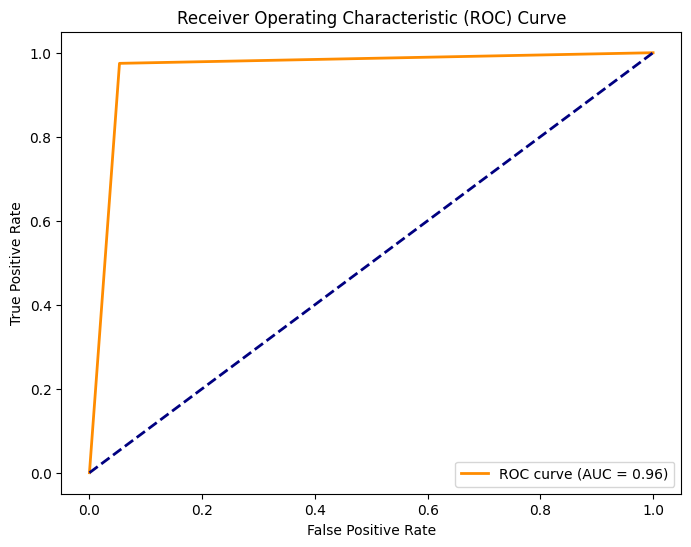

ROC AUC Score:  0.9607138166370729
Classification Error:  0.04000002145767212

Merged Dataset
Accuracy:  0.7630000114440918
63/63 [==============================] - 0s 1ms/step
Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78      1117
         1.0       0.72      0.76      0.74       883

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

Confusion matrix:
[[858 259]
 [215 668]]


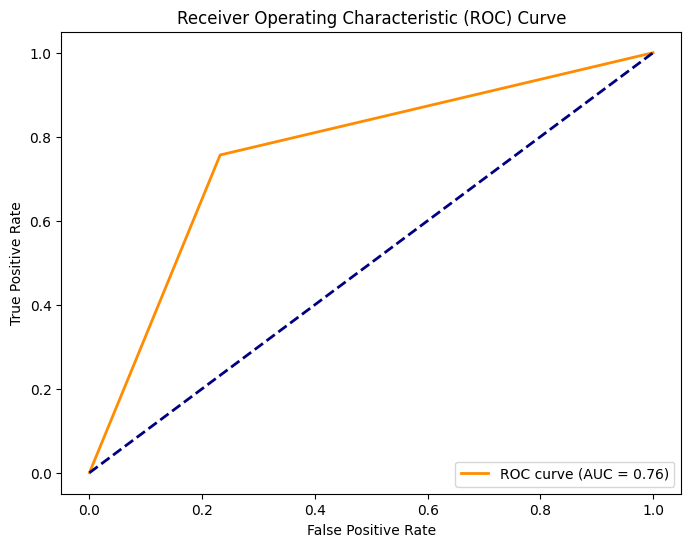

ROC AUC Score:  0.7623204040104997
Classification Error:  0.2369999885559082


In [11]:
# Apply BP to separable dataset
print("\nSeparable Dataset")
bp_sep = apply_bp(X_train_sep, y_train_sep, X_val_sep, y_val_sep)

# Apply BP to merged dataset
print("\nMerged Dataset")
bp_mer = apply_bp(X_train_mer, y_train_mer, X_val_mer, y_val_mer)